In [2]:
import tensorflow as tf
tf.__version__

'2.1.0'

## Load Fashion MNIST Dataset

In [56]:
fashion_mnist_dataset = tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist_dataset.load_data()

In [7]:
from matplotlib import pyplot as plt

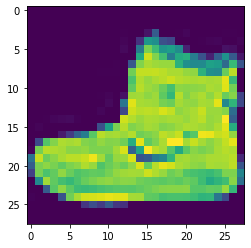

In [8]:
plt.imshow(x_train[0])a

## Scale the Data to 0-1

In [17]:
x_train = x_train/255.0
x_test = x_test/255.0

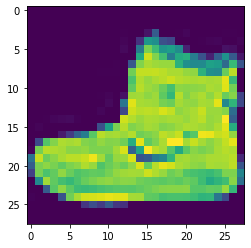

In [20]:
plt.imshow(x_train[0])

## Define and Compile Model

In [29]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(units=1024,activation=tf.nn.relu),
                            tf.keras.layers.Dense(units=512,activation=tf.nn.relu),
                            tf.keras.layers.Dense(units=256,activation=tf.nn.relu)])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [30]:
model.fit(x_train,y_train,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 14s 236us/sample - loss: 5.5495 - accuracy: 0.1058
Epoch 2/10
60000/60000 [==============================] - 13s 224us/sample - loss: 5.5452 - accuracy: 0.1000
Epoch 3/10
60000/60000 [==============================] - 13s 225us/sample - loss: 5.5452 - accuracy: 0.1000
Epoch 4/10
60000/60000 [==============================] - 13s 224us/sample - loss: 5.5452 - accuracy: 0.1000
Epoch 5/10
60000/60000 [==============================] - 15s 243us/sample - loss: 5.5452 - accuracy: 0.1000
Epoch 6/10
60000/60000 [==============================] - 16s 261us/sample - loss: 5.5452 - accuracy: 0.1000
Epoch 7/10
60000/60000 [==============================] - 16s 273us/sample - loss: 5.5452 - accuracy: 0.1000
Epoch 8/10
60000/60000 [==============================] - 19s 322us/sample - loss: 5.5452 - accuracy: 0.1000
Epoch 9/10
60000/60000 [==============================] - 26s 438us/sample - loss: 5.5452 - accuracy: 0.1

## Adding Convolution Layers

In [57]:
(x_train,y_train),(x_test,y_test) = fashion_mnist_dataset.load_data()

In [60]:
x_train = x_train.reshape(60000, 28, 28,1)
x_train = x_train/255.0

In [61]:
x_test = x_test.reshape(10000, 28, 28,1)
x_test = x_test/255.0

In [71]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
                             tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                             tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
                             tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(units=128,activation=tf.nn.relu),
                            tf.keras.layers.Dense(units=10,activation=tf.nn.softmax)])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [72]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_35 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_36 (Dense)             (None, 10)              

In [73]:
model.fit(x_train,y_train,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 43s 724us/sample - loss: 0.4378 - accuracy: 0.8421
Epoch 2/10
60000/60000 [==============================] - 46s 767us/sample - loss: 0.2901 - accuracy: 0.8933
Epoch 3/10
60000/60000 [==============================] - 43s 710us/sample - loss: 0.2450 - accuracy: 0.9089
Epoch 4/10
60000/60000 [==============================] - 49s 811us/sample - loss: 0.2143 - accuracy: 0.9200
Epoch 5/10
60000/60000 [==============================] - 51s 845us/sample - loss: 0.1869 - accuracy: 0.9299
Epoch 6/10
60000/60000 [==============================] - 52s 871us/sample - loss: 0.1655 - accuracy: 0.9379
Epoch 7/10
60000/60000 [==============================] - 50s 834us/sample - loss: 0.1443 - accuracy: 0.9452
Epoch 8/10
60000/60000 [==============================] - 49s 809us/sample - loss: 0.1266 - accuracy: 0.9524
Epoch 9/10
60000/60000 [==============================] - 49s 823us/sample - loss: 0.1116 - accuracy: 0.9

## Visualizing the Convolutions and Pooling

This code will show us the convolutions graphically. 

The print (test_labels[;100]) shows us the first 100 labels in the test set, and you can see that the ones at index 0, index 23 and index 28 are all the same value (9). 

They're all shoes. Let's take a look at the result of running the convolution on each, and you'll begin to see common features between them emerge. 

Now, when the DNN is training on that data, it's working with a lot less, and it's perhaps finding a commonality between shoes based on this convolution/pooling combination.

In [68]:
print(y_test[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


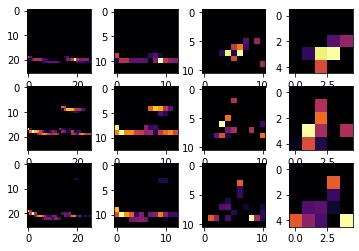

In [74]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 7
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
    f1 = activation_model.predict(x_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0,x].grid(False)
    f2 = activation_model.predict(x_test[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x].grid(False)
    f3 = activation_model.predict(x_test[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)

## EXERCISES
* Try editing the convolutions. Change the 32s to either 16 or 64. What impact will this have on accuracy and/or training time.
* Remove the final Convolution. What impact will this have on accuracy or training time?
* How about adding more Convolutions? What impact do you think this will have? Experiment with it.
* Remove all Convolutions but the first. What impact do you think this will have? Experiment with it.
* In the previous lesson you implemented a callback to check on the loss function and to cancel training once it hit a certain amount. See if you can implement that here!

## Scenarios
* No Conv Layers - 0.9793000221252441
* 1 Conv Layer - 16 filters - 0.9876000285148621
* 1 Conv Layer - 32 filters - 0.984000027179718
* 1 Conv Layer - 64 filters - 0.9876999855041504
* 2 Conv Layers - each 32 filters - 0.9896000027656555
* 2 Conv Layers - each 64 filters - 0.9904000163078308
* 2 Conv Layers - each 64 filters - 0.9898999929428101 with 20 epochs
    * When I increased the epochs the model is overfitting

## Add Callbacks

In [88]:
class myCallBacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,log={}):
        if log.get('accuracy')>0.99:
            print("Reached 99% accuracy so cancelling the training")
            self.model.stop_training=True

In [89]:
callbacks = myCallBacks()
model = tf.keras.Sequential([tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
                            tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                            tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(units=128,activation='relu'),
                            tf.keras.layers.Dense(units=10,activation='softmax')])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
flatten_20 (Flatten)         (None, 7744)              0         
_________________________________________________________________
dense_51 (Dense)             (None, 128)               991360    
_________________________________________________________________
dense_52 (Dense)             (None, 10)                1290      
Total params: 1,030,218
Trainable params: 1,030,218
Non-trainable params: 0
___________________________________________

In [90]:
model.fit(x_train,y_train,epochs=20,callbacks=[callbacks])

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 43s 712us/sample - loss: 0.3839 - accuracy: 0.8597
Epoch 2/20
60000/60000 [==============================] - 46s 759us/sample - loss: 0.2516 - accuracy: 0.9082
Epoch 3/20
60000/60000 [==============================] - 42s 701us/sample - loss: 0.2023 - accuracy: 0.9245
Epoch 4/20
60000/60000 [==============================] - 44s 725us/sample - loss: 0.1628 - accuracy: 0.9390
Epoch 5/20
60000/60000 [==============================] - 48s 796us/sample - loss: 0.1326 - accuracy: 0.9506
Epoch 6/20
60000/60000 [==============================] - 53s 890us/sample - loss: 0.1062 - accuracy: 0.9604
Epoch 7/20
60000/60000 [==============================] - 53s 881us/sample - loss: 0.0845 - accuracy: 0.9684
Epoch 8/20
60000/60000 [==============================] - 53s 883us/sample - loss: 0.0719 - accuracy: 0.9729
Epoch 9/20
60000/60000 [==============================] - 47s 787us/sample - loss: 0.0563 - accuracy: 0.9